# PHÂN TÍCH DỮ LIỆU, ĐẶT VÀ TRẢ LỜI CÂU HỎI

## 1. Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Đọc dữ liệu từ file csv

In [2]:
anime23_df = pd.read_csv('anime23_preprocessing.csv')
anime23_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


## 3. Đặt câu hỏi

### Câu 1

#### Những studio sản xuất được nhiều phim có đánh giá cao có đặc điểm gì?

- Rất nhiều chương trình mà ai đó có xu hướng thích hoặc có điểm số tốt đều đến từ cùng một studio, do đó ta nên xem xét chúng.
- Bắt đầu bằng cách lọc để chỉ xem các hãng phim anime hàng đầu (các studio sản xuất được nhiều bộ phim có `Rank` cao).
- Trả lời câu hỏi này sẽ giúp những người đang tìm kiếm những bộ phim anime chất lượng để xem có thêm gợi ý để tìm kiếm dựa trên các studio hàng đầu.
- Trả lời câu hỏi này sẽ giúp chúng ta biết được đặc điểm của những studio thành công và khác biệt của họ trong ngành.

### Câu 2

#### Trong năm 2023, nguồn tài liệu (Source) nào được chọn để sản xuất nhiều anime nhất? Animes xuất bản theo nguồn tài liệu nào được nhiều người quan tâm (Members) và yêu thích nhất (Favorites)?


Trả lời câu hỏi này ta biết được xu hướng sản xuất anime của các nhà làm phim trong năm nay thường chọn nguồn tài liệu nào. Và dựa trên các bộ anime đã xuất bản thì trong năm nay xu hướng người xem quan tâm và yêu thích những bộ anime thuộc nguồn gốc nào nhất.

### Câu 3

#### Đặc điểm chung của các anime nổi tiếng là gì?

Việc tìm ra được điểm chung của các anime nổi tiếng hiện tại có thể giúp:
- Về phía nhà sản xuất, các công ty mua bản quyền phim để chiếu trên nền tảng của mình:
    - Giúp nhà sản xuất nhận ra được những đặc điểm chung của các phim nổi tiếng từ đó có thể tìm kiếm hay sản xuất dựa trên các đặc điểm đó, để có thể dễ dàng thu hút được lượng người xem lớn.
    - Giúp các nền tảng mua bản quyền phim để chiếu có các tiêu chí cụ thể để lựa chọn anime mới, có tiềm năng đưa về nền tảng nhầm đạt được doanh thu, doanh số cao.
    - Giúp phát hiện ra xu hướng, thị hiếu của khán giả hiện giờ, ngoài ra cũng có thể tìm ra được những điểm riêng đặc biệt mà có thể phát triển sau này.
    - Có thể giúp phát hiện các nhà sản xuất  chưa nổi tiếng có thể có thêm một số thông tin lý do tại sao anime mình ít lượt theo dõi, từ đó có thể cải thiện hơn về chất lượng sao này dựa trên những thông tin nhận được.
- Về phía người xem anime:
    - Giúp biết được các loại phim nổi tiếng sẽ có những đặc điểm gì từ đó  giúp ích trong việc lựa chọn các bộ phim mới để theo dõi.
    

## 4. Trả lời câu hỏi

### Câu 1

#### Những studio sản xuất được nhiều phim có đánh giá cao có đặc điểm gì?

Trả lời câu hỏi trên sẽ giúp chúng ta tìm ra được những studio thành công và đặc điểm của họ.

Trả lời câu hỏi trên cũng giúp những người đang tìm kiếm anime hay để xem sẽ có những gợi ý rõ ràng hơn để tìm kiếm phim xem. Đặc biệt là đối với những người mới bắt đầu xem anime, họ có thể lựa chọn các anime đến từ những studio được đánh giá cao.

Để trả lời cho câu hỏi trên, chúng ta cần lấy ra bộ dữ liệu gồm các anime top đầu. Nhóm em quyết định lấy 1000 anime xếp theo `Rank` trong bộ dữ liệu (gần bằng 5% tổng số anime).

Đầu tiên, vì cột Studios là kiểu chuỗi, nên phải split nó ra và explode để mỗi cột chỉ có một giá trị của Studio.

In [3]:
ques1_df = anime23_df
ques1_df['Studios'] = ques1_df['Studios'].str.split(', ')
studios_explode = ques1_df.explode('Studios')
#Loại bỏ các Studios là Unknown
studios_explode = studios_explode[studios_explode['Studios'] != 'UNKNOWN']
studios_explode.head()
#Xem thử kết quả sau khi explode

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


Tiếp theo, ta phải lọc các bộ anime thỏa mãn điều kiện.

In [4]:
ques1_df = studios_explode[studios_explode['Rank']!=0]
ques1_df = ques1_df[ques1_df['Rank']<=1000]

Tiếp theo, cần tính số bộ phim tốt của mỗi studio.

In [5]:
top_anime_count = ques1_df.groupby('Studios')['Score'].count().sort_values(ascending = False)

Lọc dữ liệu để chỉ lấy 15 studio có nhiều anime rank cao nhất

In [6]:
top_studios = top_anime_count.nlargest(15)

Như vậy ta đã tìm ra được 15 studio sản xuất được nhiều bộ phim có đánh giá tốt cùng với số bộ phim tốt được sản xuất là:

In [7]:
top_studios

Studios
Madhouse             63
Production I.G       63
Sunrise              55
TMS Entertainment    52
Bones                43
Kyoto Animation      37
Toei Animation       36
A-1 Pictures         34
J.C.Staff            34
Shaft                33
Pierrot              29
Studio Deen          25
ufotable             20
MAPPA                20
Wit Studio           19
Name: Score, dtype: int64

#### Vẽ biểu đồ thể hiện tỉ lệ anime top đầu của các studio

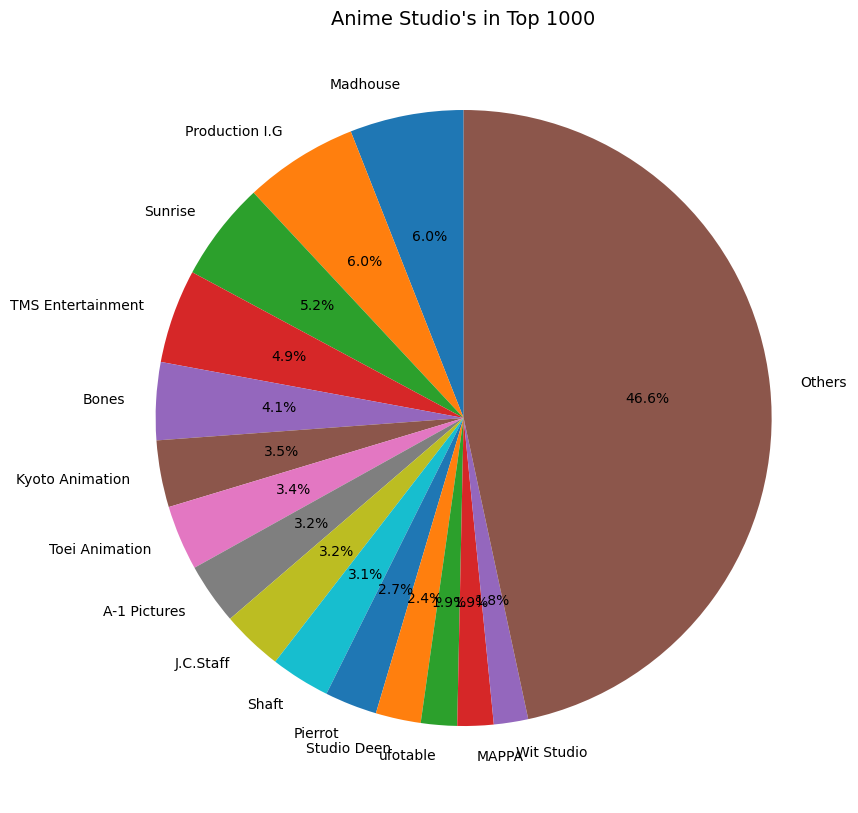

In [8]:
data = top_studios.copy()
# Gộp các studio còn lại vào nhóm "Others"
data['Others'] = ques1_df['Studios'].value_counts().sum() - top_studios.sum()
# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 10))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Anime Studio's in Top 1000", fontsize=14)
plt.show()

Nhận xét:
- Madhouse và Production I.G là hai studio có số lượng anime nhiều nhất trong top 1000 anime được đánh giá cao nhất, đều chiếm tỉ lệ 6.0%.
- Hơn một nửa số bộ phim được đánh giá cao nhất thuộc về top 15 studio hàng đầu trên tổng số hơn 1000 studio.
- Nhìn chung giữa các studio top đầu không có cách biệt quá lớn về số lượng bộ phim hay được sản xuất.
- Tất cả các xưởng phim hàng đầu trong top 15 đều đến từ Nhật Bản.

**Tiếp theo ta sẽ khám phá thêm về đặc điểm của các studio thành công. Để có cái nhìn tổng quan về hoạt động của các studio thì ta sẽ phân tích dựa trên bộ dữ liệu ban đầu có đầy đủ các anime là studios_explode.**

#### Dạng phim mà các studio trên sản xuất là phim truyền hình, anime dài tập hay movie,...?

Thực hiện thống kê về số lượng anime của mỗi loại (Type) cho từng studio

In [9]:
studios_list = top_studios.index
filtered_data = studios_explode[studios_explode['Studios'].isin(studios_list)]
type_counts = filtered_data.groupby(['Studios', 'Type']).size().reset_index(name='Count')
type_counts

,Studios,Type,Count
0,A-1 Pictures,Movie,28
1,A-1 Pictures,Music,5
2,A-1 Pictures,ONA,20
3,A-1 Pictures,OVA,18
4,A-1 Pictures,Special,59
...,...,...,...
88,ufotable,Music,1
89,ufotable,ONA,5
90,ufotable,OVA,7
91,ufotable,Special,21


Vẽ biểu đồ phân bố các dạng phim anime theo từng studio

/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

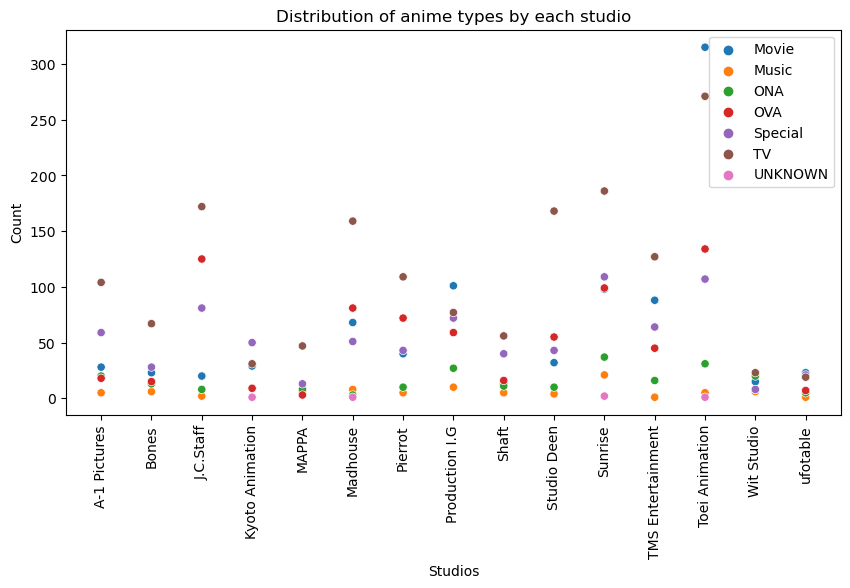

In [10]:
# Vẽ biểu đồ scatterplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Studios', y='Count', hue='Type', data=type_counts, ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime types by each studio')
plt.legend(bbox_to_anchor=(1, 1))
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Các studio đều sản xuất phim hoạt hình đa dạng, nhưng phim truyền hình (TV) là dạng phim được hầu hết các studio tập trung sản xuất nhất. Lí do có thể là vì TV là dạng dễ sản xuất và được yêu thích nhất đối với người xem. OVA và Movive cũng là 2 dạng phim phổ biến và được sản xuất nhiều.
- Các studio có số lượng anime TV nhiều nhất là Toei Animation, Sunrise và J.C.Staff. Đây là các studio lớn và có lịch sử lâu đời trong ngành anime, với nhiều anime nổi tiếng như Dragon Ball, One Piece, Gundam, Code Gea Revolutionary Girl Utena,... Đặc biệt, Toei Animation là studio lớn, có lượng sản xuất hàng đầu và cũng sản xuất nhiều Movie và OVA anime nhất.
- Các studio sản xuất nhiều anime Movie là Madhouse, Production I.G và TMS Entertainment. Đây là các studio có kỹ năng vẽ hoạt họa cao và có nhiều bộ phim hoạt hình đoạt giải thưởng quốc tế, như Paprika, Wolf Children, The Girl Who Leapt Through Time, Redline, Ghost in the Shello,...
- Các studio sản xuất nhiều anime OVA là Studio Deen, J.C.Staff và Pierrot. Đây là các studio có nhiều anime dài tập và có nhiều phần ngoại truyện, như Rurouni Kenshin, Higurashi no Naku Koro ni, Umineko no Naku Korlaye,...
- Các studio MAPPA, WIT Studio và ufotable sản xuất nhiều anime ONA. Đây là các studio mới và có nhiều anime được phát hành trên các nền tảng trực tuyến, như Netflix, Amazon Prime và Crunchyroll. Một số anime của họ là Yuri!!! on Ice, Inuyashiki, Dororo, Vinland Saga, Attack on Titan, Fate/Zero, Fate/stay night: Unlimited Blade Wo,...
- Các studio Kyoto Animation, Shaft và A-1 Pictures sản xuất khá nhiều anime Special. Đây là các studio có nhiều anime hài hước và lãng mạn, và có nhiều tập đặc biệt để tăng thêm sự gắn kết với khán giả, như K-On!, Clannad, The Melancholy of Haruhi Suzumiya, Monogatari Series, Puella Magi Madoka Magica, Sword Art Online, Fairy ,...

#### Các studio có xu hướng chuyển thể như thế nào?

Thực hiện thống kê về số lượng anime của mỗi Source cho từng studio

In [11]:
source_counts = filtered_data.groupby(['Studios', 'Source']).size().reset_index(name='Count')
source_counts

,Studios,Source,Count
0,A-1 Pictures,4-koma manga,9
1,A-1 Pictures,Game,41
2,A-1 Pictures,Light novel,43
3,A-1 Pictures,Manga,73
4,A-1 Pictures,Mixed media,3
...,...,...,...
169,ufotable,Manga,20
170,ufotable,Original,7
171,ufotable,Other,1
172,ufotable,Unknown,3


Vẽ biểu đồ phân bố các nguồn chuyển thể theo từng studio

/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

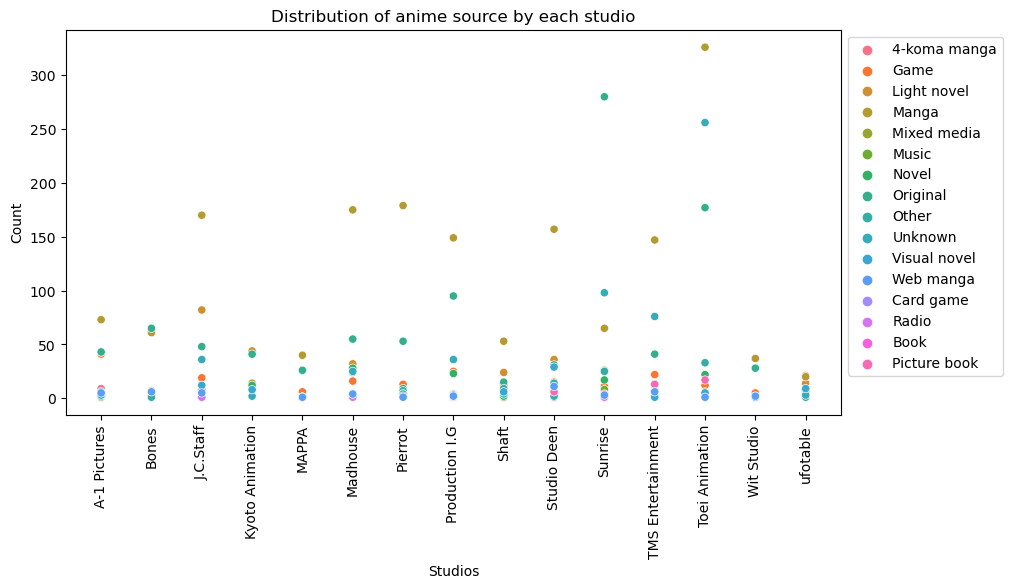

In [12]:
# Vẽ biểu đồ scatterplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Studios', y='Count', hue='Source', data=source_counts, ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime source by each studio')
plt.legend(bbox_to_anchor=(1, 1))
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Các studio lớn như Production I.G, J.C.Staff, MADHOUSE và Toei Animation có số lượng anime chuyển thể nhiều nhất, từ các nguồn đa dạng như manga, light novel, game, v.v. Điều này cho thấy họ có khả năng thích ứng với nhiều thể loại và phong cách khác nhau, cũng như có mối quan hệ tốt với các nhà xuất bản và nhà phát triển game.
- Các studio nhỏ hơn như Kyoto Animation, Shaft, ufotable và Wit Studio có số lượng anime chuyển thể ít hơn, nhưng chủ yếu là từ các nguồn riêng biệt như light novel, visual novel, web manga, v.v. Điều này cho thấy họ có sự chọn lọc và tập trung cao trong việc chuyển thể các tác phẩm có chất lượng và độc đáo, cũng như có phong cách nghệ thuật đặc trưng và nhận dạng.
- Các studio khác như Bones, MAPPA, Pierrot, A-1 Pictures và Sunrise có số lượng anime chuyển thể trung bình, từ các nguồn khác nhau, nhưng có xu hướng nhiều hơn về các thể loại như hành động, phiêu lưu, khoa học viễn tưởng, v.v. Điều này cho thấy họ có kinh nghiệm và năng lực trong việc chuyển thể các tác phẩm có yếu tố kịch tính và hấp dẫn, cũng như có kỹ thuật hoạt họa và hiệu ứng cao.

#### Sự tương quan giữa số lượng và chất lượng

Đầu tiên cần tính tổng số bộ phim mà mỗi studio đã sản xuất.

In [13]:
total_anime = filtered_data['Studios'].value_counts()
print(total_anime)

Studios
Toei Animation       864
Sunrise              552
J.C.Staff            408
Madhouse             371
Production I.G       346
TMS Entertainment    341
Studio Deen          312
Pierrot              279
A-1 Pictures         234
Bones                152
Shaft                141
Kyoto Animation      129
MAPPA                 80
Wit Studio            80
ufotable              76
Name: count, dtype: int64


Tiếp theo, cần tính điểm trung bình các bộ phim của mỗi studio.

In [14]:
filtered_data = filtered_data.dropna(subset=['Score'])
avg_score_by_studio = filtered_data.groupby("Studios")['Score'].mean()
avg_score_by_studio

Studios
A-1 Pictures         7.117105
Bones                7.323919
J.C.Staff            6.772591
Kyoto Animation      7.315952
MAPPA                7.163243
Madhouse             6.923148
Pierrot              6.762519
Production I.G       6.992699
Shaft                7.052681
Studio Deen          6.918229
Sunrise              6.841954
TMS Entertainment    6.945070
Toei Animation       6.623422
Wit Studio           7.197945
ufotable             7.210282
Name: Score, dtype: float64

Cuối cùng, vẽ biểu đồ.

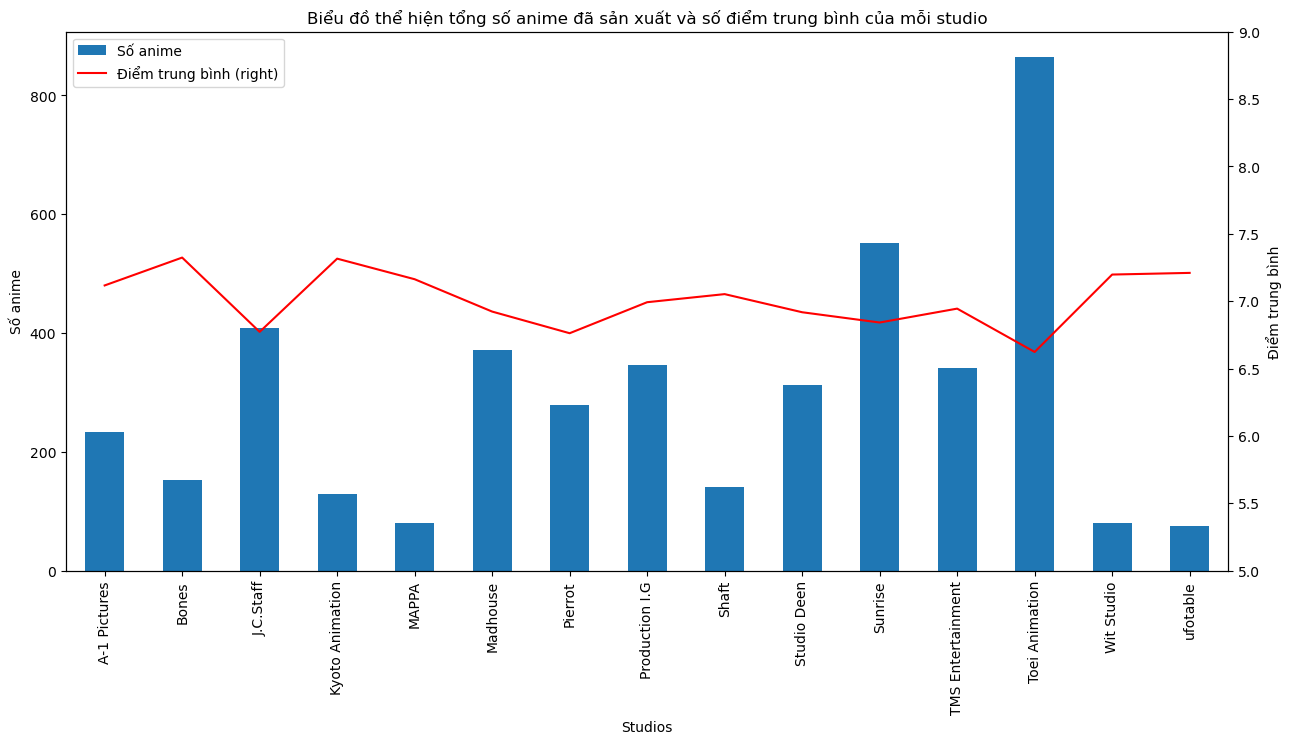

In [15]:
total_anime = total_anime.sort_index()
avg_score_by_studio = avg_score_by_studio.sort_index()
#Vẽ biểu đồ
fig, ax = plt.subplots(figsize = (15,7))

ax1 = total_anime.plot(kind='bar', rot = 90, label = 'Số anime')
ax2 = avg_score_by_studio.plot(secondary_y=True, rot = 90, color = 'r', label = 'Điểm trung bình')
ax2.set_ylim(5, 9)

#Vẽ 2 legend trên cùng 1 bảng
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
handles = h1+h2
labels = l1+l2
ax.legend(handles, labels, loc='upper left')

#Thêm title và xlabel, ylabel

plt.title("Biểu đồ thể hiện tổng số anime đã sản xuất và số điểm trung bình của mỗi studio")
ax1.set_ylabel("Số anime")
ax2.set_ylabel("Điểm trung bình")

plt.show()

Nhận xét:
- Một số studio có số lượng anime sản xuất thấp nhưng điểm trung bình cao như Kyoto Animation, ufotable, Wit Studio, v.v. Điều này có thể do họ chọn lọc và tập trung vào các tác phẩm có chất lượng và độc đáo, hoặc do họ có phong cách nghệ thuật đặc trưng và nhận dạng.
- Một số studio có số lượng anime sản xuất cao nhưng điểm trung bình thấp hơn như Toei Animation, Pierrot, J.C.Staff, v.v. Điều này có thể do họ chuyên về các thể loại phổ biến nhưng ít sáng tạo, do họ không đầu tư nhiều vào kỹ thuật hoạt họa và nội dung hoặc do sự chênh lệch giữa chất lượng các sản phẩm. Toei Animation có xếp hạng trung bình thấp nhất với 6.623422 trên 10, mặc dù họ là studio có số lượng sản xuất lớn nhất.
- Có một số studio có số lượng anime sản xuất và điểm trung bình ở mức trung bình, ví dụ như Bones, Studio Deen, Production I.G., v.v. Điều này có thể do họ có sự cân bằng giữa số lượng và chất lượng, hoặc do họ có nhiều thể loại và phong cách khác nhau.
- Tuy nhiên, có thể thấy rằng số lượng và chất lượng anime của các studio không có mối tương quan cố định, còn mà phụ thuộc vào nhiều yếu tố khác nhau.

#### Vẽ boxplot thể hiện điểm trung bình các phim của mỗi studio

/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/antuan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

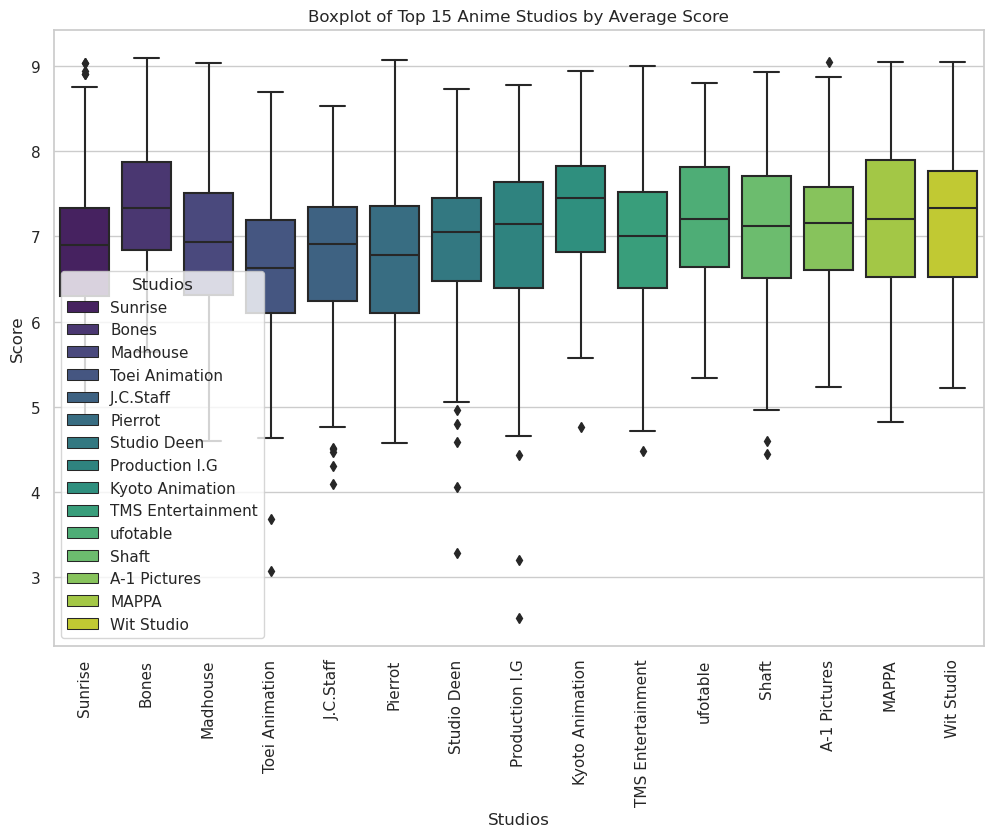

In [16]:
# Create a boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='Studios', y='Score', data=filtered_data, hue='Studios', palette='viridis', dodge=False)
plt.title('Boxplot of Top 15 Anime Studios by Average Score')
plt.xticks(rotation=90)
plt.show()

Nhận xét:
- Biểu đồ này cho ta cái nhìn sâu sắc hơn về chất lượng các tác phẩm của mỗi studio.
- Vì đây là top các studio hàng đầu nên chất lượng sản xuất anime của các studio khá đồng đều, với điểm trung bình nằm trong khoảng từ 6 đến 8. Tuy nhiên, cũng có một số outliers, cho thấy có những phim xuất sắc hoặc kém chất lượng.
- Các studio như Studio Deen, Production I.G và Shaft có phạm vi điểm rộng dù số bộ phim họ sản xuất ở mức trung bình và thấp, cho thấy sự chênh lệch lớn trong chất lượng sản phẩm của họ.
- Có thể thấy rằng các studio thành công này không sản xuất nhiều tác phẩm nhất hay có mức điểm trung bình cao nhất. Có thể nói rằng chất lượng công việc mà các studio này thực hiện mới khiến họ có được rất nhiều chương trình lọt vào top 1000 với điểm số tốt.

### Câu 2


Tiến hành lọc thông tin cột Source để xem có tổng cộng bao nhiêu nguồn gốc được lựa chọn sản xuất anime trong năm 2023

In [17]:
source_df=anime23_df['Source'].unique()
source_df

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Other', 'Unknown', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Mixed media', 'Card game',
       'Web novel'], dtype=object)

Chúng ta sẽ làm việc trên 3 cột Source, Favorites và Members để trả lời câu hỏi, nên ta sẽ lấy dữ liệu của 3 cột này

In [18]:
filtered_df=anime23_df[['Source','Favorites','Members']]
filtered_df

,Source,Favorites,Members
0,Original,78525,1771505
1,Original,1448,360978
2,Manga,15035,727252
3,Original,613,111931
4,Manga,14,15001
...,...,...,...
24900,Web manga,0,0
24901,Web novel,0,0
24902,Web novel,0,0
24903,Original,0,0


Tiến hành thống kê số lượng phim, tổng số và trung bình người quan tâm và yêu thích theo từng loại nguồn phim 

In [19]:
new_df=filtered_df.copy()
group_df=new_df.groupby('Source').agg({'Favorites': ['count', 'sum', 'mean'], 'Members': ['count', 'sum', 'mean']})
group_df.columns = ['Favorites_count', 'Favorites_sum', 'Favorites_mean', 'Members_count', 'Members_sum', 'Members_mean']
group_df=group_df.reset_index()
group_df

,Source,Favorites_count,Favorites_sum,Favorites_mean,Members_count,Members_sum,Members_mean
0,4-koma manga,314,143843,458.098726,314,19335380,61577.643312
1,Book,191,4964,25.989529,191,935404,4897.403141
2,Card game,68,5226,76.852941,68,1633788,24026.294118
3,Game,1232,105724,85.814935,1232,23424702,19013.556818
4,Light novel,968,1682339,1737.953512,968,186126676,192279.623967
5,Manga,4687,5748160,1226.404950,4687,431220403,92003.499680
6,Mixed media,162,16784,103.604938,162,3156626,19485.345679
7,Music,395,10917,27.637975,395,2066721,5232.205063
8,Novel,709,309307,436.258110,709,24852505,35052.898449
9,Original,9622,1762392,183.162752,9622,136597029,14196.323945


Vì cột Favorites_count và Members_count cũng đều là tính số lượng phim nên dễ dàng nhìn thấy hai cột này là một, ta tiến hành giữ lại một cột và đặt lại tên là Count, rồi xóa đi một cột nhé

In [20]:
group_df.rename(columns={'Favorites_count': 'Count'}, inplace=True)
group_df.drop('Members_count', axis=1, inplace=True)
group_df

,Source,Count,Favorites_sum,Favorites_mean,Members_sum,Members_mean
0,4-koma manga,314,143843,458.098726,19335380,61577.643312
1,Book,191,4964,25.989529,935404,4897.403141
2,Card game,68,5226,76.852941,1633788,24026.294118
3,Game,1232,105724,85.814935,23424702,19013.556818
4,Light novel,968,1682339,1737.953512,186126676,192279.623967
5,Manga,4687,5748160,1226.404950,431220403,92003.499680
6,Mixed media,162,16784,103.604938,3156626,19485.345679
7,Music,395,10917,27.637975,2066721,5232.205063
8,Novel,709,309307,436.258110,24852505,35052.898449
9,Original,9622,1762392,183.162752,136597029,14196.323945


Như vậy là đã hoàn thành việc xử lý dữ liệu 

#### Thống kê lượng phim theo từng nguồn phim

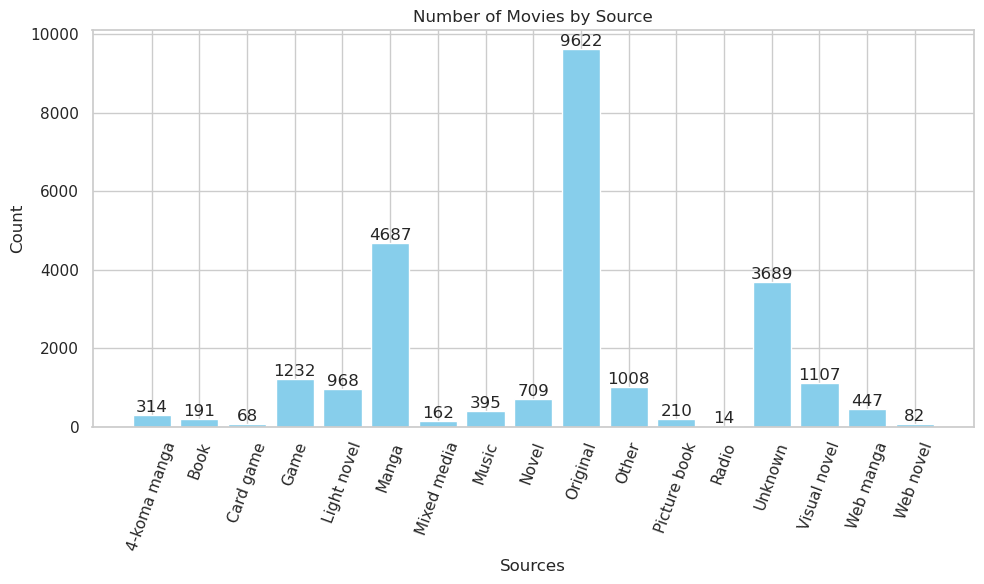

In [21]:
# Lấy dữ liệu từ group_df
sources = group_df['Source']
count = group_df['Count']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(sources, count, color='skyblue')
plt.xlabel('Sources')
plt.ylabel('Count')
plt.title('Number of Movies by Source')
plt.xticks(rotation=70)
plt.tight_layout()

# Gắn số liệu ở giữa đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


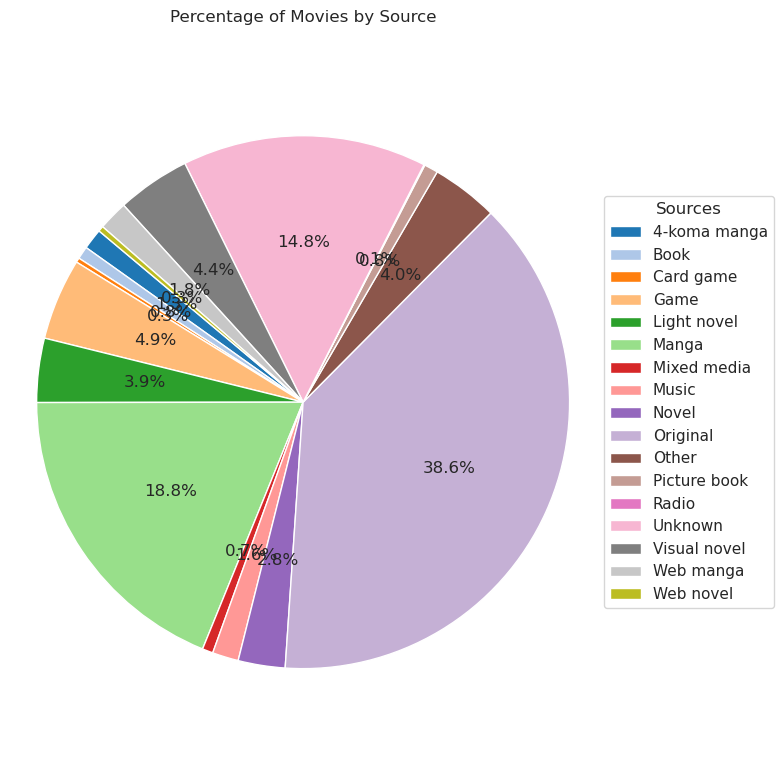

In [22]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(count, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of Movies by Source')

plt.legend(wedges, sources, loc='center left', bbox_to_anchor=(1, 0.5), title='Sources')

plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Nhận xét

- Trong năm 2023, xu hướng sản xuất phim thường chọn các nguồn từ Original, Manga
  + Original nhiều nhất với 9622 bộ chiếm 38,6% 
  + Manga xếp thứ nhì với 4687 bộ chiếm 18,8%
- Như vậy, ta có thể thấy trong năm 2023 các nhà sản xuất anime ưu tiên việc chuyển thể các bộ phim từ nguyên tác và từ Manga. Bởi vì Original và Manga thường có cốt truyện phong phú và sâu sắc, giúp nhà làm phim xây dựng nên nền tảng nội dung vững chắc nên thường được các nhà làm phim ưu ái lựa chọn.
- Tuy nhiên, ngoài hai nguồn này chiếm số lượng lớn thì trong năm 2023, vẫn còn có đa dạng nhiều nguồn khác như: Game (4,9%), Visual novel (4,4%), Light novel (3,9%)

#### Thống kê lượng người quan tâm trung bình theo từng nguồn phim 

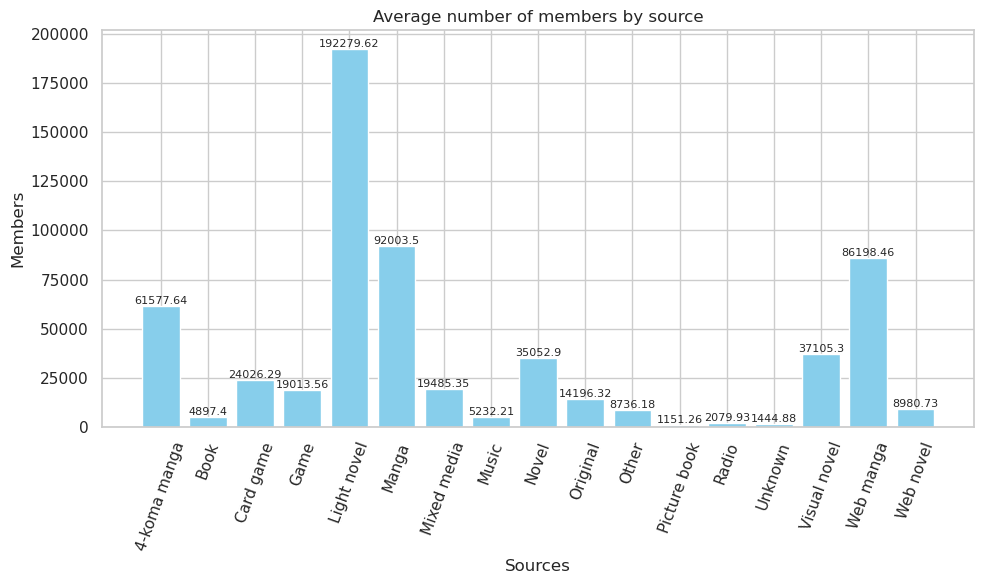

In [23]:
# Lấy dữ liệu từ group_df
sources = group_df['Source']
members = group_df['Members_mean']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(sources, members, color='skyblue')
plt.xlabel('Sources')
plt.ylabel('Members')
plt.title('Average number of members by source')
plt.xticks(rotation=70)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()

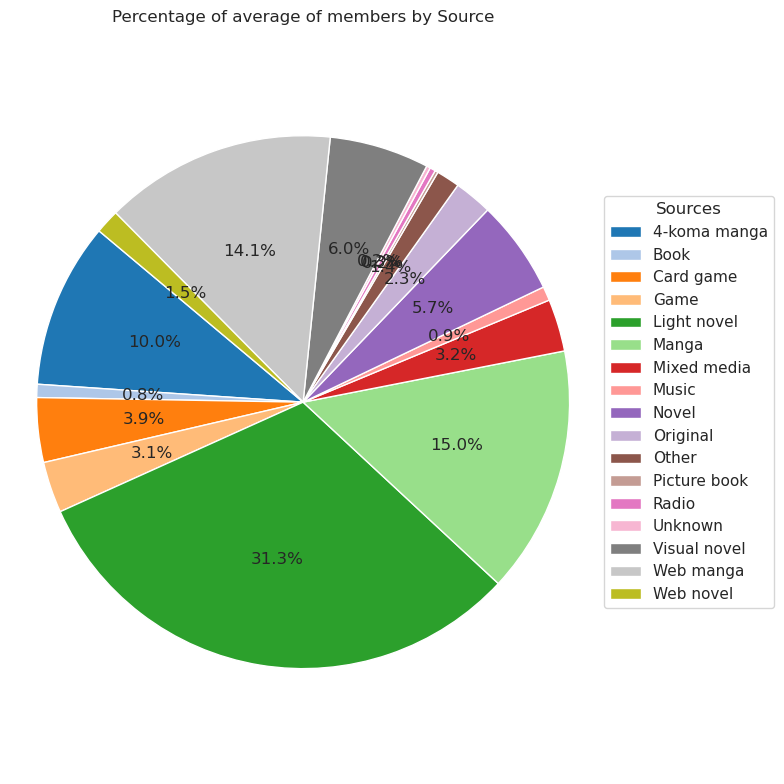

In [24]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(members, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of average of members by Source')

plt.legend(wedges, sources, loc='center left', bbox_to_anchor=(1, 0.5), title='Sources')

plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Nhận xét:

- Tuy lượng phim sản xuất lấy nguồn từ Light novel chỉ chiếm 3,9% tổng số phim năm nay nhưng lại nhận về độ quan tâm trung bình của khán giả cao nhất 31,3%. Điều này chứng tỏ các anime có nguồn từ Light novel tiếp cận đến khán giả khá tốt và dàn trải.
- Tiếp theo là Manga với độ quan tâm trung bình của khán giả là 15%, Web manga với độ quan tâm trung bình là 14,1%
- Tuy nguồn từ Original được sản xuất nhiều phim nhất nhưng độ quan tâm trung bình lại khá thấp chỉ 2,3%
- Qua các thông số này, các nhà làm phim có thể hiểu rõ hơn về sở thích của khán giả, từ đó điều chỉnh chiến lược sản xuất và đáp ứng nhu cầu thị trường một cách hiệu quả.

#### Thống kê lượng người yêu thích trung bình theo từng nguồn phim 

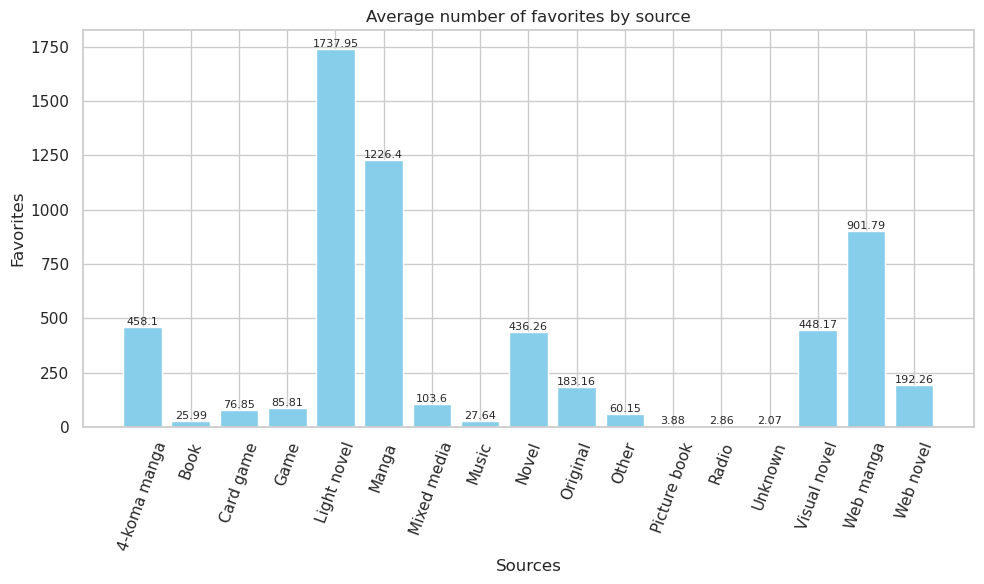

In [25]:
# Lấy dữ liệu từ group_df
sources = group_df['Source']
favorites = group_df['Favorites_mean']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(sources, favorites, color='skyblue')
plt.xlabel('Sources')
plt.ylabel('Favorites')
plt.title('Average number of favorites by source')
plt.xticks(rotation=70)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()

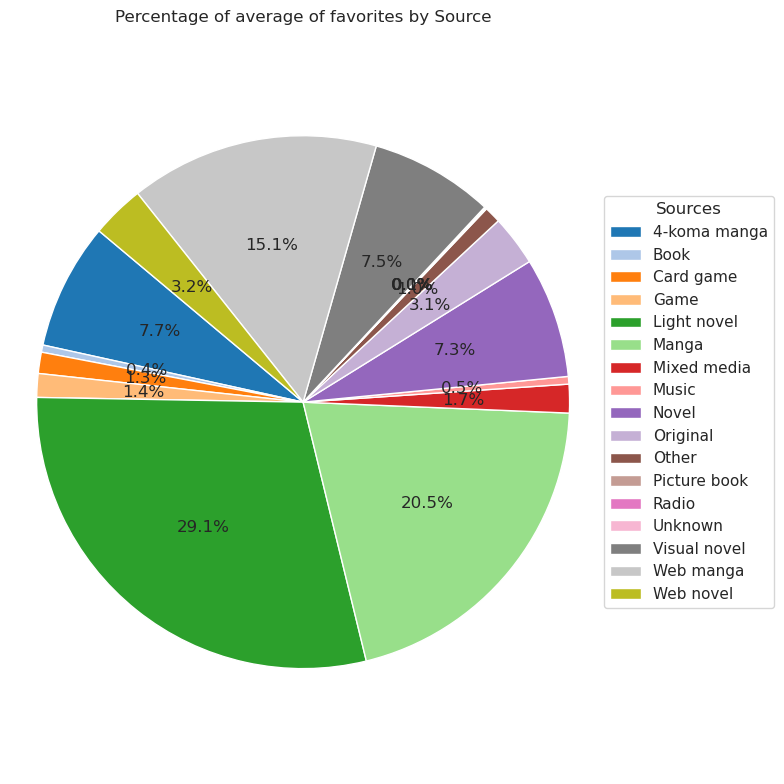

In [26]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(favorites, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of average of favorites by Source')

plt.legend(wedges, sources, loc='center left', bbox_to_anchor=(1, 0.5), title='Sources')

plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Nhận xét:

- Light novel chiếm độ yêu thích trung bình lớn nhất đến 29,1% và tiếp theo là Manga là 20,5%
- Tương tự như độ quan tâm trung bình thì đa phần khán giả cũng bày tỏ yêu thích cho các bộ anime có nguồn từ Light novel và Manga một cách đồng đều. 
- Đây cũng là một số liệu giúp các nhà làm phim cân nhắc thử sức sản xuất anime từ nguồn Light novel hay đa dạng các nguồn khác nhiều hơn như: Web Manga (15,1%), 4-koma manga (7,7%), ...

### Câu 3

#### Để trả lời câu hỏi này đầu tiên em sẽ lấy 2500 anime có xếp hạng `Popularity` cao nhất. Em lấy 25000 vì bộ dữ liệu mình có gần 25000 anime nên em lấy 1/10 số anime top đầu để đánh giá.

Đầu tiên xếp các anime theo thứ tự Popularity

In [ ]:
df_sorted_pop_asc = anime23_df.sort_values(by='Popularity', ascending=True)
df_sorted_pop_asc.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
24904,55735,Shijuuku Nichi,NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Original,PG-13 - Teens 13 or older,0.0,0,0,NaN,0
24498,55227,Night Flower,NaN,Boys Love,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Other,UNKNOWN,0.0,0,0,NaN,0
24494,55218,The Little Name,NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Unknown,G - All Ages,0.0,0,0,NaN,0
24468,55178,Ridin' (IMLAY Remix),NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Original,G - All Ages,0.0,0,0,NaN,0
24464,55174,Bad Boy (Slom Remix),NaN,UNKNOWN,Music,1.0,Finished Airing,UNKNOWN,UNKNOWN,Original,G - All Ages,0.0,0,0,NaN,0


Ở đây ta thấy các cột `Popularity` có giá trị 0 là do cột chưa được đánh giá độ phổ biến do có quá ít thông tin về anime do đó ta phải loại bỏ những cột này.

In [ ]:
df_sorted_pop_asc = df_sorted_pop_asc[df_sorted_pop_asc['Popularity'] != 0]
df_sorted_pop_asc.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
7428,16498,Shingeki no Kyojin,8.54,"Action, Award Winning, Drama, Suspense",TV,25.0,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,R - 17+ (violence & profanity),107.0,1,163844,2660903.0,3744541
1393,1535,Death Note,8.62,"Supernatural, Suspense",TV,37.0,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",Madhouse,Manga,R - 17+ (violence & profanity),74.0,2,167586,2619479.0,3713315
3961,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,R - 17+ (violence & profanity),1.0,3,217606,2020030.0,3176556
10408,30276,One Punch Man,8.50,"Action, Comedy",TV,12.0,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",Madhouse,Web manga,R - 17+ (violence & profanity),127.0,4,62408,2131099.0,3058666
6596,11757,Sword Art Online,7.20,"Action, Adventure, Fantasy, Romance",TV,25.0,Finished Airing,"Aniplex, Genco, DAX Production, ASCII Media Wo...",A-1 Pictures,Light novel,PG-13 - Teens 13 or older,3055.0,5,67014,2072240.0,2951821


Tiếp theo ta lấy 2500 anime có độ phổ biến top đầu vào dataframe `top_pop_anime23_df`

In [ ]:
top_pop_anime23_df = df_sorted_pop_asc.iloc[:2500,:]
top_pop_anime23_df.shape

(2500, 16)

Kiểm tra thử xem giá trị `Popularity` tối thiểu và tối đa xem đã đúng chưa (1-2500)

In [ ]:
print(f'Giá trị tối thiểu: ', top_pop_anime23_df['Popularity'].min())
print(f'Giá trị tối đa: ', top_pop_anime23_df['Popularity'].max())

Giá trị tối thiểu:  1
Giá trị tối đa:  2500


Có vẻ dataframe ta rút trích thông tin đã tốt, ta có thể tiếp tục xử lý.

#### Sau khi đã lấy được 2500 anime có độ phổ biến cao nhất, ta thử kiểm tra các giá trị bị thiếu của dataframe vừa lấy được để kiểm tra xem có cột nào có nhiều giá trị bị thiếu không nhằm mục đích lựa chọn cho khảo sát

Ta sẽ kiểm tra các cột Genres, Type, Source, Rating vì đây là các thông tin của anime mà ta có thể tìm điểm chung, các cột còn lại do có quá nhiều giá trị khác nhau nên rất khó để ta tìm điểm chung hay phân loại giữa chúng nên em quyết định chọn 4 cột này.

In [ ]:
survey_columns = ['Genres', 'Type', 'Source', 'Rating']
for col in survey_columns:
    if col != 'Episodes':
        percentage_missing = (anime23_df[col] == 'UNKNOWN').mean() * 100
    else:
        percentage_missing = anime23_df[col].isna().mean() * 100
    print(f'Phần trăm giá trị còn thiếu của cột \'{col}\' là {percentage_missing:.2f}%')

Phần trăm giá trị còn thiếu của cột 'Genres' là 19.79%
Phần trăm giá trị còn thiếu của cột 'Type' là 0.30%
Phần trăm giá trị còn thiếu của cột 'Source' là 0.00%
Phần trăm giá trị còn thiếu của cột 'Rating' là 2.69%


Hầu hết phần trăm các giá trị bị thiếu đều không quá lớn chỉ có cột Genres là giá trị bị mất khá nhiều gần 20% nhưng nó vẫn có thể chấp nhận được. Tuy nhiên việc khảo sát giá trị ỏ cột này có thể giảm phần trăm giá trị có thể tin cậy so với các cột còn lại.

#### Sau khi đã hoàn tất việc lấy 2500 anime có độ phổ biến cao nhất và đảm bảo các giá trị ở các cột này không quá lớn cho việc khảo sát, tiếp theo chúng ta sẽ tìm điểm chung của những anime này thông qua các khảo sát về:
- Thể loại của phim (Genres)
- Hình thức chiếu (Type)
- Nguồn (Source)
- Giới hạn độ tuổi (Rating)

Đầu tiên ta sẽ đếm các giá trị của từng cột trên, đối với cột Genres (thể loại) ta phải thao tác riêng vì đây là cột chứa nhiều giá trị trong 1 ô, ta phải tách các ô ra riêng lẻ rồi mới xử lý, các cột còn lại thì không cần tách do đây là các cột đơn. Sau khi ta đếm số lượng của từng giá trị trong cột ta lưu nó lại dưới một dictionary. Vậy ta sẽ có tổng cộng 4 dictionary cho 4 cột để ta dễ dàng thao tác.

Đếm giá trị của cột thể loại

In [ ]:
def split_and_melt(column):
    df_split = column.str.split(', ', expand=True).melt().drop('variable', axis=1)
    return df_split['value']
long_df = top_pop_anime23_df[['Genres']].agg(split_and_melt)
genres_distribution = long_df.agg(lambda column: pd.Series(column).value_counts().to_dict())

Đếm giá trị của các cột còn lại

In [ ]:
single_columns = ['Type', 'Source', 'Rating']
single_cate_profile = pd.DataFrame(index=["num_diff_vals", "distribution"])
num_diff_vals = top_pop_anime23_df[single_columns].nunique()
distribution = top_pop_anime23_df[single_columns].agg(lambda column: pd.Series(column).value_counts().to_dict())
single_cate_profile[single_columns] = [num_diff_vals, distribution]

single_cate_profile

,Type,Source,Rating
num_diff_vals,7,15,7
distribution,"{'TV': 1764, 'Movie': 341, 'OVA': 181, 'Specia...","{'Manga': 1111, 'Light novel': 487, 'Original'...","{'PG-13 - Teens 13 or older': 1632, 'R - 17+ (..."


Lưu vào dictionary tương ứng

In [ ]:
genres_distribution = genres_distribution['Genres']
type_distribution = single_cate_profile.iloc[1,0]
source_distribution = single_cate_profile.iloc[1,1]
rating_distribution = single_cate_profile.iloc[1,2]

#### Đánh giá chung

Vẽ biểu đồ tương ứng cho từng cột

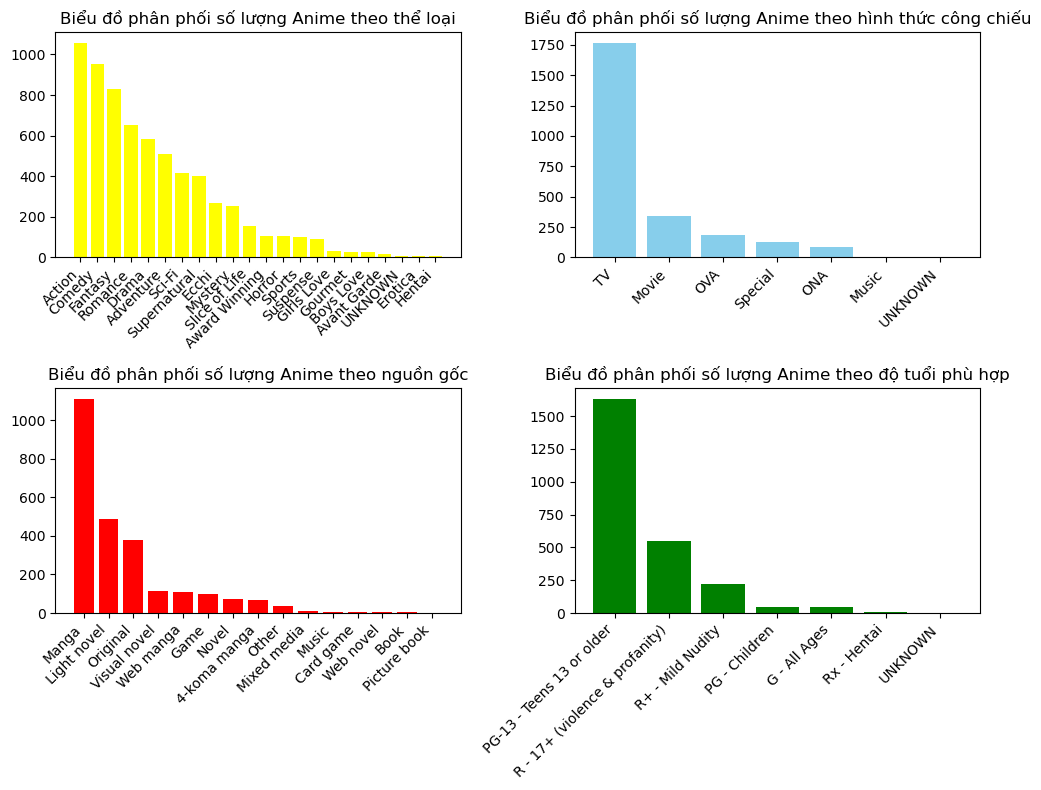

In [ ]:

# Tạo biểu đồ cột
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Kích thước 2x2

# Biểu đồ cột 1
axs[0, 0].bar(genres_distribution.keys(), genres_distribution.values(), color='yellow')
axs[0, 0].set_title('Biểu đồ phân phối số lượng Anime theo thể loại')
axs[0, 0].set_xticks(np.arange(len(genres_distribution.keys())))

# Biểu đồ cột 2
axs[0, 1].bar(type_distribution.keys(), type_distribution.values(), color='skyblue')
axs[0, 1].set_title('Biểu đồ phân phối số lượng Anime theo hình thức công chiếu')
axs[0, 1].set_xticks(np.arange(len(type_distribution.keys())))

# Biểu đồ cột 3
axs[1, 0].bar(source_distribution.keys(), source_distribution.values(), color='red')
axs[1, 0].set_title('Biểu đồ phân phối số lượng Anime theo nguồn gốc')
axs[1, 0].set_xticks(np.arange(len(source_distribution.keys())))

# Biểu đồ cột 4
axs[1, 1].bar(rating_distribution.keys(), rating_distribution.values(), color='green')
axs[1, 1].set_title('Biểu đồ phân phối số lượng Anime theo độ tuổi phù hợp')
axs[1, 1].set_xticks(np.arange(len(rating_distribution.keys())))

# Quay nhãn của trục x để dễ nhìn
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Tinh chỉnh giao diện
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

#### Nhận xét chung

Từ 4 biểu đồ trên ta có thể dễ dàng nhận biết được các đặc điểm chung nhất của các bộ anime nổi tiếng:
- Đầu tiên, hầu hết đều thuộc thể loại hành động (action), hài kịch (comedy) hoặc huyền ảo (fantasty).
- Các phim sẽ được công chiếu dưới dạng phim truyền hình (TV).
- Các phim được phổ biến thường chuyển thể từ Manga (truyện tranh của Nhật bản).
- Và thường độ tuổi phù hợp để xem các anime này sẽ là các khán giả từ 13 tuổi trở lên.

#### Tiếp theo ta sẽ đánh giá riêng từng cột cụ thể

##### Đầu tiên ta sẽ bắt đầu với cột thể loại 

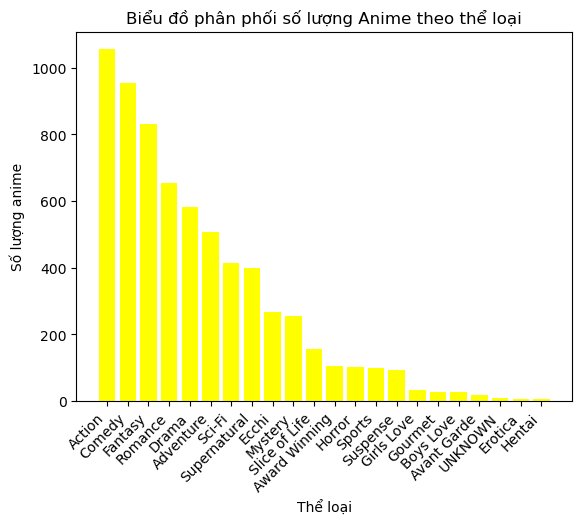

In [ ]:
# Vẽ biểu đồ cột
plt.bar(genres_distribution.keys(), genres_distribution.values(), color='yellow')
plt.xticks(rotation=45, ha='right')
# Thêm tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân phối số lượng Anime theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng anime')

# Hiển thị biểu đồ
plt.show()

##### Nhận xét

Với thể loại của anime, ta đã biết là anime có rất nhiều thể loại, ngoài ra mỗi anime lại có thể chứa rất nhiều thể loại khác nhau nên biểu đồ cột của chúng ta củng giảm không quá đột ngột, tức là không có thể loại nào chiếm quyền độc tôn cả.

Nhìn vào biểu đồ ta có thể chia ra các thể loại làm 3 nhóm
- Nhóm dẫn đầu: là các thể loại rất phổ biến và được rất nhiều người xem thích với số lượng anime thuộc các thể loại này là trên 800 anime bao gồm thể loại hành động (action), hài kịch (comedy), và Fantasty (Huyền ảo), các thể loại này có hầu hết ở các anime nổi tiếng và thường được chọn làm thể loại chính của anime.
- Nhóm thứ hai: là các thể loại có số lượng anime thuộc thể loại nào vào khoảng 200 - 600 anime, đây có thể là các thể loại chính hoặc các thể loại đi kèm theo các phim trong nhóm thứ nhất gồm các thể loại: lãng mạng (romance), kịch (drama), phiêu lưu (adventure), khoa học viễn tưởng (sci-fi), huyền bí (supernatural), nhẹ nhàng (ecchi), bí ẩn (mystery), đời thường (slice of life).
- Nhóm thứ 3 là nhóm các thể loại rất ít xuất hiện trong các anime nổi tiếng tức là nếu làm các thể loại thuộc các dạng này thì khá ít cơ hội để anime có thể trở nên nổi tiếng nếu nó không được đầu tư kỹ lưỡng và xem xét đến những yếu tố khác. Các anime dạng này gồm: kinh dị (horror), thể thao (sports), kịch tính (suspense), đồng tính nữ (girls love), ẩm thực (gourmet), đồng tính nam (boy love), ý tưởng mới (avant garde), erotica và hentai.
- Ta không xem xét đến thể loại Award Winning vì nó là thể loại được ghi nhận cho các anime được trao thưởng và hiện tại chỉ có khoảng dưới 200 anime đạt được thể loại này.

##### Tổng kết

- Nhìn vào biểu đồ và xem xét lại ta có thể thấy các thể loại được ưa thích thường tập trung vào các thể loại dễ hiểu, đơn giản và mang một tính chất tích cực. Ngoài ra thì người xem còn thích các loại phim anime theo dạng không có thực, tức là các anime về các thể loại huyền ảo, huyền bí, khoa học viễn tưởng,... có thể các thể loại đó là điểm mạnh của anime vì các phim truyền hình thông thường sẽ khó đem lại các trải nghiệm phim dài tập hay các kĩ xảo về các loại phim dạng khoa học viễn tưởng như phim anime.
- Ngoài ra các phim về tình cảm, đời thường, hoặc các phim có xu hướng tiêu cực thường sẽ không dễ phổ biến, điều đó tương đối dễ hiểu.
- Và cuối cùng là các phim về thể loại tình dục hay các vấn đề xoay quanh cuộc sống hằng ngày như thể thao hay ẩm thực hầu như sẽ không thể phổ biến trong anime được.

Cuối cùng, ta có thể thấy rõ ràng là điểm mạnh của anime là có thể xây dựng được các thế giới huyền ảo, nơi mà con người không thể tiếp xúc được, nó nhấn mạnh vào trí tưởng tượng, và các điều mới mẻ, các bộ phim càng có các thể loại với sự tưởng tượng phong phú càng có độ nổi tiếng cao. Đồng thời đi kèm với những sự huyền ảo đó là các màng hành động đối kháng hết sức đỉnh cao cũng như là một chút hài hước đó là đặc điểm chung của các bộ anime nổi tiếng hiện nay.

##### Tiếp theo là hình thức công chiếu

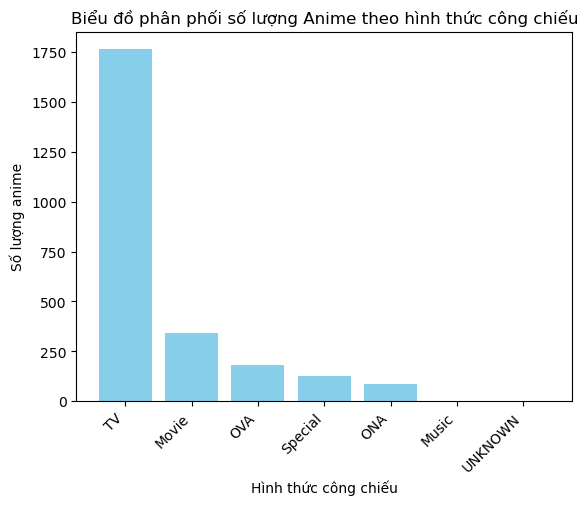

In [ ]:
# Vẽ biểu đồ cột
plt.bar(type_distribution.keys(), type_distribution.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
# Thêm tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân phối số lượng Anime theo hình thức công chiếu')
plt.xlabel('Hình thức công chiếu')
plt.ylabel('Số lượng anime')

# Hiển thị biểu đồ
plt.show()

##### Nhận xét

Phần này thì ta không có gì quá nhiều để nhận xét, do sự chệnh lệch quá lớn của TV so với các thể loại khác, điều đó cũng dễ hiểu do hầu hết người xem đều muốn xem anime ở dạng dài tập (có thể coi như vậy mới đã), hầu hết các thể loại công chiếu còn lại đều sẽ là nội dung sẽ lấy từ các bộ phim chính rồi làm thành các movie hay OVA tương ứng. Tuy nhiên vẫn có một số anime rất nổi tiếng thuộc về Movie, tuy nhiên chỉ một số ít tác giả làm được điều này. Vì so với sáng tác các nội dung riêng lẻ thì ta xây dựng 1 câu truyện dài và chiếu nó theo từng tập sẽ dễ viết hơn và sẽ giúp người xem có sự chờ đợi và trông ngóng giúp thu hút nhiều người xem hơn. Và cũng vì các thể loại khác chỉ công chiếu trong một thời gian ngắn nên sự thu hút cũng sẽ không kéo dài được nhưu Movie.

##### Tổng kết

Dễ thấy nếu ta muốn anime có độ nổi tiếng cao ta nên chọn hình thức sản xuất dạng TV, còn đối với movie ta có thể cân nhắc, vì một kịch bản đủ hay thì chỉ duy nhất 1 tập thì mới mang lại cho người xem sự hứng thú và giúp bộ anime trở nên nổi tiếng.

##### Nguồn gốc anime

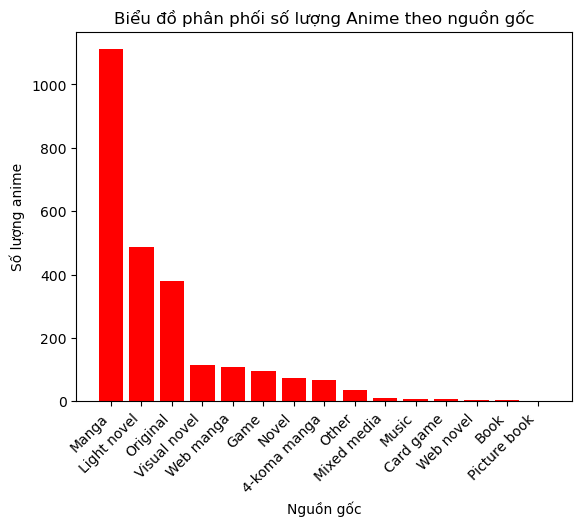

In [ ]:
# Vẽ biểu đồ cột
plt.bar(source_distribution.keys(), source_distribution.values(), color='red')
plt.xticks(rotation=45, ha='right')
# Thêm tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân phối số lượng Anime theo nguồn gốc')
plt.xlabel('Nguồn gốc')
plt.ylabel('Số lượng anime')

# Hiển thị biểu đồ
plt.show()

##### Nhận xét

Ở nguồn gốc thì anime thường sẽ được chuyển thể từ Manga, Light novel hoặc có thể sản xuất giống phim thông thường (Orginal). Tuy nhiên sự lấn át của Manga cho thấy người xem rất thích xem các loại anime được chuyển thể từ Manga (truyện tranh nhật bản) và hầu hết các bộ phim top đầu hiện nay đều được chuyển thể từ Manga. Thay vì sản xuất theo cách thông thường, thì chuyển thể từ truyện tranh đảm bảo cho anime có 1 tập khán giả theo dõi cố định từ Manga chuyển sang, ta cũng có thể dễ dàng đánh giá được một bộ Manga hay để chuyển thể trước thay vì mạo hiểm công bố 1 sản phẩm mà chưa bao giờ được khán giả tiếp cận.

##### Tổng kết

Vậy nên để anime được nổi tiếng, ta nên lựa chọn việc chuyển thể từ Manga hiện nay các anime được chuyển thể từ light novel cũng đang được tiếp nhận nhưng vẫn chưa có độ phổ biến cao bằng Manga, còn Original là 1 thể loại mạo hiểm cho nhà sản xuất vì nó sẽ không có 1 sự kiểm chứng trước như Manga hay Light Novel, tuy nhiên cả 3 dạng này đều có số phim nổi tiếng chiếm số lượng lớn, nhưng nhiều nhất vẫn là chuyển thể từ Manga. Nên nhà sản xuất vẫn nên ưu tiên việc chuyển thể các Manga hay và ăn khách hiện nay để anime của mình dễ nổi tiếng.

##### Cuối cùng ta phân tích về độ tuổi phù hợp của các anime nổi tiếng

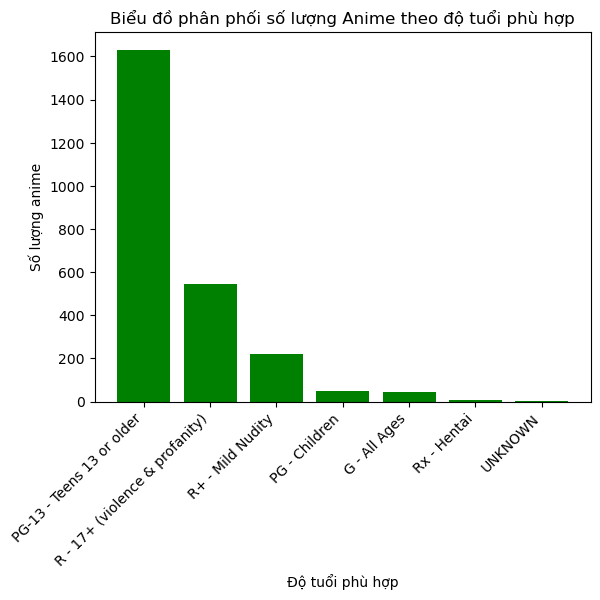

In [ ]:
# Vẽ biểu đồ cột
plt.bar(rating_distribution.keys(), rating_distribution.values(), color='green')
plt.xticks(rotation=45, ha='right')
# Thêm tiêu đề và nhãn cho trục
plt.title('Biểu đồ phân phối số lượng Anime theo độ tuổi phù hợp')
plt.xlabel('Độ tuổi phù hợp')
plt.ylabel('Số lượng anime')

# Hiển thị biểu đồ
plt.show()

##### Nhận xét

Các phim nổi tiếng thường có độ tuổi khán giả phù hợp là 13 tuổi trở lên, điều này rất hợp lý, khi ta xét đến thể loại, hầu hết các thể loại đều là huyền ảo và hành động. Các phim hành động và huyền ảo thì sẽ không phù hợp với trẻ quá nhỏ, chưa đủ hiểu về nội dung của phim. Và tất nhiên anime vẫn là phim hoạt hình nên đối tượng của các bộ phim này vẫn sẽ hướng đến là các em bé nhỏ tuổi, tuy nhiên đối tượng của anime sẽ hướng đến một độ tuổi cao hơn một xíu, tầm 13 tuổi. Khi đó các em nhỏ đã có khả năng hiểu cơ bản về nội dung và cốt truyện, kèm theo đó là sự thích thú của các em đối với các loại phim huyền ảo , thích khám phá điều mới lạ khi còn nhỏ. Điều này không khó hiểu thì độ tuổi anime phù hợp của các phim nổi tiếng đều tập trung vào nhóm đối tượng này. Ngoài ra các đối tượng khác cũng có đặc biệt là nhóm từ 17 tuổi trở lên tuy nhiên các nhóm này không chiếm số lượng quá nhiều do các phim càng hạn chế độ tuổi người dùng thì tất nhiên độ phổ biến không cao.

##### Tổng kết

Cuối cùng ta có thể dễ dàng thấy rằng anime nên được sản xuất để phù hợp cho khán giá trong độ tuổi tầm 13 tuổi trở lên 1 xíu. Đây là nhóm khán giả tiềm năng lớn, vì sẽ không bận như người lớn nên có thể theo dõi xuyên suốt, và đây cũng là độ tuổi thích phim hoạt hình vì các yếu tố dễ hiểu và thú vị so với nhóm người lớn. Còn nhóm khán giả nhỏ hơn thì thường sẽ khó hiểu nội dung nên sẽ không theo dõi phim 1 cách lâu dài.

#### Tổng kết chung

Sau khi xem qua ta có một số tổng kết như sau:
- Đối với nhà sản xuất, nên sản xuất anime theo dạng công chiếu TV, phim sẽ được chuyển thể từ Manga có tập đọc giả cao, đồng thời các phim đó nên có các thể loại huyền ảo, hành động và hài hước là chính, đồng thời sẽ thêm 1 số yếu tố khác đặc biệt là nên sản xuất phim thuộc thể loại hành động và phù hợp với độ tuổi khoảng 13 tuổi trở lên. Có thể chọn 1 trong 4 hoặc có thể thỏa cả 4 tiêu chí, có thể xác suất để độ nổi tiếng của anime sẽ lớn, nhưng vẫn chưa chắc, vẫn còn rất nhiều yếu tố khác tác động đến một bộ anime tuy nhiên các tiêu chí này sẽ giúp nhà sản xuất có 1 hướng đi tốt nếu như lựa chọn. Ngoài ra vẫn có thể lựa chọn các hướng đi khác, ngoài các hướng đi này nó có thể là một bước đột phá trong giới anime nhưng có thể xác suất thành công sẽ thấp. Cần rất nhiều thời gian và công sức để tạo ra một anime đặc biệt nhưng vẫn có thể nổi tiếng.
- Tiếp theo đối với người xem thì có thể rút ra một số điểm chung của anime nổi tiếng hiện tại là sẽ giành cho trẻ em từ 13 tuổi trở lên và thuộc các chủ đề huyền ảo hoặc hành động, vì thế nếu người xem phù hợp có thể theo dõi hoặc nếu là phụ huynh có thể kiểm tra xem các đặc điểm này của anime có phù hợp với con mình chưa để cân nhắc, nhắc nhở bé.

# PHẢN ÁNH

## 1. Bạn đã gặp những khó khăn gì?

### Hân

- Bước đặt câu hỏi là bước khó nhất sao cho câu hỏi hợp lý, có giá trị và không bị mơ hồ.
- Bước đầu phải xử lý lại bộ dữ liệu vì cột Studios có nhiều giá trị.
- Xác định tiêu chuẩn hợp lý cho các bộ phim tốt để lọc bộ dữ liệu.
- Xác định những cột dữ liệu cần thiết để trả lời câu hỏi, khó khăn trong việc khám phá và tìm ra các thống kê nổi bật để trả lời câu hỏi. Khó khăn trong việc chọn những phân tích và thống kê hợp lý nhất để trả lời cho câu hỏi của mình.
- Nhận xét khách quan và có giá trị dựa trên dữ liệu và thống kê.

### Khuê

- Chưa biết cách khai thác sâu và nhiều khía cạch của dữ liệu
- Việc xử lý dữ liệu còn khá sơ sài
- Chưa biết cách mở rộng câu hỏi để phán ảnh nhiều hơn về nguồn dữ liệu

### Tuấn

- Lần đầu tiên sử dụng github nên em hơi khó khăn trong thời gian đầu.
- Tìm dataset và khám phá dữ liệu, quá trình tìm kiếm một dataset phù hợp rất khó khăn, đầu tiên phải tìm được chủ đề phù hợp sau đó phải tìm các dataset thích hợp, ròi vào chi tiết xem từng ý nghĩa chung nhất được giới thiệu bởi nơi cung cấp, chọn được dataset nhưng khi vào làm thì không ổn lại phải tìm lại dataset.
- Quá trình merge code khá khó khăn với người mới bắt đầu sử dụng Github và đặc biệt là cả nhóm đều lần đầu tiên sử dụng.
- Quá trình đặt câu hỏi cũng khá khó vì câu hỏi phải mang được giá trị thực tế, và đây là lần đầu được thao tác tự đặt các câu hỏi liên quan đến bộ dữ liệu mình chọn nên rất khó để tìm được 1 câu hỏi thích hợp.
- Quà trình khám phá dữ liệu do bộ dữ liệu này chứa các ký tự UNKNOWN ở cả ô giá trị số và chuỗi nên lúc đầu em hơi bối rối trong quá trình xử lý.
- Về cách cấu trúc file như thế nào cho nó hợp lý và chưa biết mình đã tiền xử lý dữ liệu hợp lý chưa để trả lời câu hỏi hay chưa rõ trong quá trình xử lý hay trả lời câu hỏi có những chỗ nào sai xót hay không hợp lý chưa.

## 2. Bạn đã học được những gì

### Hân

- Đánh giá được ý nghĩa và giá trị của các bộ dữ liệu. Biết một bộ dữ liệu như thế nào là tốt và phù hợp.
- Có một số kinh nghiệm về tiền xử lý dữ liệu.
- Đặt được các câu hỏi có ý nghĩa về mật dữ liệu.
- Trình bày một báo cáo phân tích dữ liệu hoàn chỉnh.

### Khuê

- Học được cách xử lý và hiểu nhiều hơn về một bộ dữ liệu có nhiều tính chất
- Biết được có những dữ liệu sẽ có những cột không cần thiết và không có ích cho quá trình đánh giá dữ liệu


### Tuấn

- Đầu tiên là cách sử dụng Github, điều đầu tiên em cảm thấy tuyệt vời, vì học tới năm 3 mà giờ mới biết sử dụng github, thật sự nó giúp ích rất nhiều cho những môn khác nữa.
- Biết cách tìm hiểu một bộ dữ liệu, hiểu được cách xử lý nó như thế nào.
- Có cái nhìn tổng quan về khoa học dữ liệu.
- Học được cách teamwork ngoài ra còn là teamwork trên github.
- Học được thêm về cách rút trích các thông tin quan trọng thông qua dữ liệu.
- Biết cách đặt các câu hỏi có ý nghĩa.
- Biết cách tận dụng các thông tin có được.
- Học được thêm về markdown và code python trong xử lý và biểu diễn dữ liệu bằng thư viện pandas.

## 3. Nếu có nhiều thời gian hơn bạn sẽ làm gì?

- Thống kê thêm về phân bố Rating, Genres của các top-studio.
- Phân tích sự tương quan giữa các yếu tố như số lượng người xem, số lượng người yêu thích và điểm số của các studio. Phân tích mức độ phổ biến và mức độ tương tác của người xem.
- Phân tích sự ảnh hưởng của các studio đối với nhau. Tìm ra các studio có cùng nhà sản xuất, các studio đồng sản xuất phim... Điều này sẽ giúp hiểu được sự hợp tác và cạnh tranh giữa các studio.
